<a href="https://colab.research.google.com/github/Mattshanevdberg/ML-FruitPunchAI_BootCamp/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing required libraries 
import tensorflow as tf 
# from tensorflow.keras import Model, Input 
# from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout, Rescaling
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# import cv2
import numpy as np 
import matplotlib.pyplot as plt
import os 
from google_drive_downloader import GoogleDriveDownloader as gdd 
# import shutil
#import gdown
from numpy import load

# setting random seeds 
# np.random.seed(0)
# tf.random.set_seed(0)
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

# print tensorflow version
# tf.__version__

#STEP 0: Load Data

## DID NOT USE: Method used in the actual challenge

In [2]:
# downloading the classification dataset from google drive 
url='https://drive.google.com/file/d/1EqPczd5IbO7tdqnV2zQWKesLACpZUlQl/view?usp=sharing'
file_id = url.split('/')[-2]
gdd.download_file_from_google_drive(file_id=file_id, dest_path='/content/classification_dataset.zip', unzip=True)

In [5]:
# specifying folderpaths for train, val, test folders for poachers and no_poachers
folderpath_train = '/content/classification_dataset/Labeled data/images/train'
folderpath_val   = '/content/classification_dataset/images/val'
#folderpath_test  = '/content/classification_dataset/test/'
# folderpath_train_poachers   = os.path.join(folderpath_train,'poacher_images')
# folderpath_train_nopoachers = os.path.join(folderpath_train,'no_poacher_images')
# folderpath_val_poachers     = os.path.join(folderpath_val,'poacher_images')
# folderpath_val_nopoachers   = os.path.join(folderpath_val,'no_poacher_images')
# folderpath_test_poachers    = os.path.join(folderpath_test,'poacher_images')
# folderpath_test_nopoachers  = os.path.join(folderpath_test,'no_poacher_images')

# printing file counts 
print(len(os.listdir('/content/classification_dataset/')), 'trainset images' )
# print(len(os.listdir(folderpath_train_nopoachers)), 'trainset without poacher images')
# print(len(os.listdir(folderpath_val_poachers)), 'valset poacher images' )
# print(len(os.listdir(folderpath_val_nopoachers)), 'valset without poacher images')
# print(len(os.listdir(folderpath_test_poachers)), 'testset poacher images' )
# print(len(os.listdir(folderpath_test_nopoachers)), 'testset without poacher images')

FileNotFoundError: ignored

## DID NOT USE: Method used in challenges


In [3]:
#Test Image Data 
#https://drive.google.com/drive/folders/1xfnda2lsYc8zYOFL9cO-5pieGkqO8FCe?usp=share_link
# #download the data
#!pip install --upgrade --no-cache-dir gdown
!gdown --id 1xfnda2lsYc8zYOFL9cO-5pieGkqO8FCe

# # #https://drive.google.com/file/d/1Ger_cgbqilVW6K6xXlYGcNQBzn1YBFf8/view?usp=sharing

# file_id = "1xfnda2lsYc8zYOFL9cO-5pieGkqO8FCe"
# gdown.download(
#     f"https://drive.google.com/uc?export=download&confirm=pbef&id={file_id}"
# )

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1xfnda2lsYc8zYOFL9cO-5pieGkqO8FCe 



In [3]:
# train = load('/content/Labeled data-20211126T095740Z-001.zip')

In [34]:
# train_X = []
# train_X = train['Labeled data/images/train/video53_1_003468.PNG']
# train_X[0:5]


b'\x89PNG\r'

## DID NOT USE: Attempting to download dataset again...(method 3 - from the internet)

In [7]:
import os
import sys
from pycocotools.coco import COCO
import urllib
import zipfile

In [ ]:
# don't need to do this step as we already have the file
market1501_url = 'https://drive.google.com/file/d/1EqPczd5IbO7tdqnV2zQWKesLACpZUlQl/view?usp=share_link'
urllib.request.urlretrieve(market1501_url , filename = 'market1501.zip' )

In [8]:
with zipfile.ZipFile('/content/Labeled data-20211126T095740Z-001.zip' , 'r') as zip_ref:
    zip_ref.extractall()

##0.1 Method 4 - Simply mounting my drive manually and copying the folders across

this was done by mounting my drive and creating a shortcut to the relevant folder in the drive. 

I actually end up copying the the data across later into my drive so I can edit the folder structure in the drive

## PUTTING DATA INTO ARRAYS (can ignore this, it is done in the COCO section)

#STEP 1: get familiar with visualizing the data and annotations

## Some useful sorces on COCO and visualizing data/using COCO:

https://www.neuralception.com/cocodatasetapi/

https://towardsdatascience.com/how-to-work-with-object-detection-datasets-in-coco-format-9bf4fb5848a4#:~:text=The%20%E2%80%9CCOCO%20format%E2%80%9D%20is%20a,with%20your%20COCO%20formatted%20data.

https://medium.com/mlearning-ai/coco-dataset-what-is-it-and-how-can-we-use-it-e34a5b0c6ecd


##DID NOT USE: loading data into arrays
This was before I understood COCO. Allows you to view the images though. Uses the concept from the actual challenge

In [51]:
folder_path_train_images = '/content/Labeled_data/images/train/'
print(len(os.listdir(folder_path_train_images)), 'trainset poacher images' )

folder_path_val_images = '/content/Labeled_data/images/val'
print(len(os.listdir(folder_path_val_images)), 'valset poacher images' )

folder_path_test_images = '/content/Labeled_data/images'
print(len(os.listdir(folder_path_test_images)), 'test poacher images' )

# #attempt to convert files to png instead of PNG
# files = os.listdir(folder_path_train_images)
# for filename in files:
#     file_wo_ext, file_ext = os.path.splitext(filename)
#     if file_ext == ".PNG":
#         newfile = file_wo_ext + ".png"
#         os.rename(folder_path_train_images+filename, folder_path_train_images+newfile)

#attempt to convert files to PNG instead of png
files = os.listdir(folder_path_train_images)
for filename in files:
    file_wo_ext, file_ext = os.path.splitext(filename)
    if file_ext == ".png":
        newfile = file_wo_ext + ".PNG"
        os.rename(folder_path_train_images+filename, folder_path_train_images+newfile)

#THis is how they did it in the actual lab but it doesn't seem to work here
image_size = (256, 256)
batch_size = 64

print('train_ds')
train_ds = tf.keras.utils.image_dataset_from_directory(
    labels=None,
    directory=folder_path_train_images,
    batch_size=batch_size,
    color_mode = 'grayscale'
)


7904 trainset poacher images
3278 valset poacher images
1902 test poacher images
train_ds
Found 7904 files belonging to 1 classes.


##DID NOT USE: plot of data
This code  runs with the above block. Allows you to see the loaded images

In [44]:
train_ds.take(2)

<TakeDataset element_spec=TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None)>

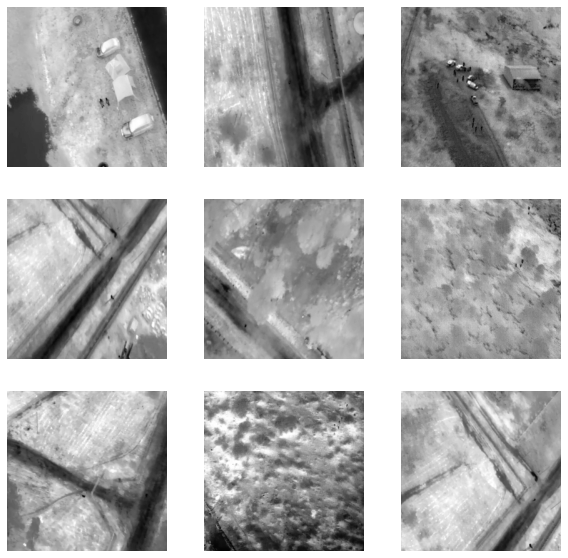

In [42]:
# visualizing the data 
# train 
plt.figure(figsize=(10, 10))
for images in train_ds.take(1): # images are eager tensors with 'float32' dtype and shape [None,256,256,1], labels are not present
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().squeeze().astype('uint8') 
        plt.imshow(img, cmap='gray')
        #plt.title(int(labels[i]))
        plt.axis("off")

# as we can see in the plots, images with poachers are labelled as 1, images without poachers are labelled as 0

# visualizing the data 
# train 
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1): # images are eager tensors with 'float32' dtype and shape [64,256,256,1], labels are eager tensors with 'int32' dtype and shape (64,)
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         img = images[i].numpy().squeeze().astype('uint8') 
#         plt.imshow(img, cmap='gray')
#         plt.title(int(labels[i]))
#         plt.axis("off")

# as we can see in the plots, images with poachers are labelled as 1, images without poachers are labelled as 0

##1.1 Playing with COCO
Loading the data and viewing it in the COCO format (allows you to see the bounding boxes)

In [5]:
#installing some libs
!pip install pycocotools
from pycocotools.coco import COCO
import skimage.io as io
from pathlib import Path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
annFile = Path('/content/drive/MyDrive/Labeled_data/annotations/instances_train.json')
dataDir=Path('/content/drive/MyDrive/Labeled_data/images/train')


coco = COCO(annFile)
imgIds = coco.getImgIds()
imgs = coco.loadImgs(imgIds[0:2])

loading annotations into memory...
Done (t=1.26s)
creating index...
index created!


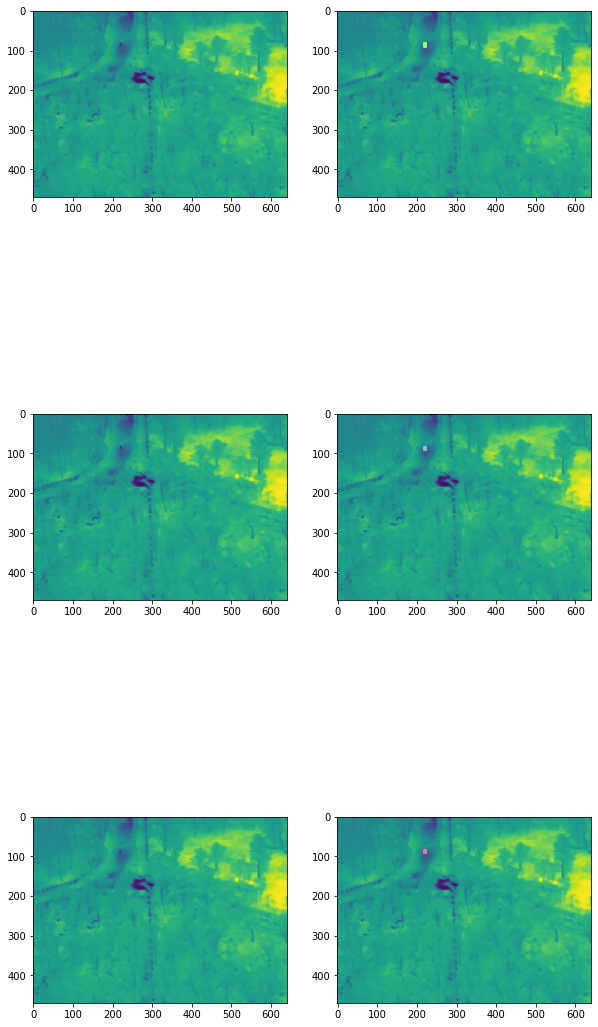

In [24]:

imgs = coco.loadImgs(imgIds[110:113])
_,axs = plt.subplots(len(imgs),2,figsize=(10,7 * len(imgs)))
for img, ax in zip(imgs, axs):
    I = io.imread(dataDir/img['file_name'])
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)

# Step 3: Use transfer learning or build your own CNN from scratch to create an object detection model
I have chosen the YOLOv5 transfer learning (only really because it was used in the challenge and I am not sure how to pick these)


## 3.1 Changing Data to YOLOv5 format for use in YOLOv5

###Copy the contents from the shared folder to my drive so I can change format

In [3]:
%cd /content/drive/MyDrive/Labeled_data

/content/drive/.shortcut-targets-by-id/1xfnda2lsYc8zYOFL9cO-5pieGkqO8FCe/Labeled data


In [5]:
!pwd

/content/drive/.shortcut-targets-by-id/1xfnda2lsYc8zYOFL9cO-5pieGkqO8FCe/Labeled data


In [6]:
!cp -r '/content/drive/.shortcut-targets-by-id/1xfnda2lsYc8zYOFL9cO-5pieGkqO8FCe/Labeled data/.' '/content/drive/MyDrive/Capstone_New_Labeled_Data'

### DID NOT USE: Change format to YOLOv5 format
note that first I must change the folders in the drive to have the annotations in the same folder as the images

Okay just did this using the UI online as I could not figure out how to use the API

In [7]:
# we'll change directory to the newly created folder of our images
%cd /content/drive/MyDrive/Capstone_New_Labeled_Data/images/test

/content/drive/MyDrive/Capstone_New_Labeled_Data/images/test


In [8]:
# fill this in from your project's settings
MY_KEY = "hHJUSXPwaTUnqTgPRiGI"

In [9]:
import os
import requests
import base64
import io
from PIL import Image

In [16]:
for filename in os.listdir("."):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".PNG"):
      print(filename)

      # Load Image with PIL
      image = Image.open(filename).convert("RGB")

      # Convert to JPEG Buffer
      buffered = io.BytesIO()
      image.save(buffered, quality=90, format="JPEG")

      # Base 64 Encode
      img_str = base64.b64encode(buffered.getvalue())
      img_str = img_str.decode("ascii")



      # Construct the URL
      upload_url = "".join([
          "https://api.roboflow.com/dataset/matthew-van-den-berg-te46k/capstone_project-gq93u/upload",
          "?api_key=" + MY_KEY,
          "&name=" +str(filename),
          "&split=train"
      ])

      # POST to the API
      r = requests.post(upload_url, data=img_str, headers={
          "Content-Type": "application/x-www-form-urlencoded"
      })

      # Output result
      print(r.json())


      img_id = r.json()['id']

      annotation_filename = os.path.splitext(filename)[0]+'.json'
      print(annotation_filename)

      # Read Annotation as String
      annotation_str = open(annotation_filename, "r").read()

      # Construct the URL
      upload_url = "".join([
          "https://api.roboflow.com/dataset/chess-subsample/annotate/" + img_id,
          "?api_key=" + MY_KEY,
          "&name=", annotation_filename
      ])

      # POST to the API
      r = requests.post(upload_url, data=annotation_str, headers={
          "Content-Type": "text/plain"
      })

      # Output result
      print(r.json())

video82_2_000431.PNG


JSONDecodeError: ignored

##3.2 Now to start using YOLOv5

###3.2.1 Install All requirements

In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 14335, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 14335 (delta 45), reused 54 (delta 22), pack-reused 14242
Receiving objects: 100% (14335/14335), 13.67 MiB | 12.58 MiB/s, done.
Resolving deltas: 100% (9852/9852), done.
/content/yolov5
     |████████████████████████████████| 182 kB 5.3 MB/s 
     |████████████████████████████████| 62 kB 946 kB/s 
     |████████████████████████████████| 1.6 MB 37.6 MB/s 
     |████████████████████████████████| 42 kB 677 kB/s 
     |████████████████████████████████| 145 kB 8.7 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 67 kB 5.1 MB/s 
     |████████████████████████████████| 138 kB 39.1 MB/s 
     |████████████████████████████████| 178 kB 46.0 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
Setup complete. Using torch 1.12.1+cu113 (CPU)


##Modify some files to train off data
1. modify the coco128.yaml file -->  actually replace it with the YAML file from the roboflow download
